# Data Preparation

- Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
- Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
- Outlier: Memeriksa outlier dan menangani outlier jika ada.
- Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
- Feature encoding: Melakukan feature encoding jika diperlukan.

## Deskripsi Data
Dataset columns:

`age`: The person’s age in years

`sex`: The person’s sex (1 = male, 0 = female)

`cp`: chest pain type
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

`trestbps`: The person’s resting blood pressure (mm Hg on admission to the hospital)

`chol`: The person’s cholesterol measurement in mg/dl

`fbs`: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

`restecg`: resting electrocardiographic results
- Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

`thalach`: The person’s maximum heart rate achieved

`exang`: Exercise induced angina (1 = yes; 0 = no)

`oldpeak`: ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment
- 0: downsloping;
- 1: flat;
- 2: upsloping

`ca`: The number of major vessels (0-4)

`thal`: A blood disorder called thalassemia
- Value 0: NULL (dropped from the dataset previously)
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

`target`: Heart disease (0 = no, 1= yes)

In [38]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame 'df'
df = pd.read_csv('heart.csv')

# Menampilkan lima baris pertama dari DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Menampilkan jumlah baris dan kolom dalam DataFrame
df.shape

(1025, 14)

DataFrame memiliki 1025 baris dan 14 kolom.

In [4]:
# Menampilkan informasi terperinci tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Setiap kolom memiliki 1025 non-null entries, artinya tidak ada missing-value dalam DataFrame ini. Tipe data kolom terdiri dari int64 (integer) dan float64 (float).

## Missing Value

In [5]:
# Menghitung jumlah nilai yang hilang (missing value) untuk setiap kolom dalam DataFrame.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada missing value dalam dataset yang digunakan. Hal ini menunjukkan bahwa data telah lengkap dan tidak perlu dilakukan penanganan khusus untuk missing value.

## Duplicate Value

In [6]:
# Menampilkan baris-baris duplikat
duplicateDF = df[df.duplicated(keep=False)]
duplicateDF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
# Menghitung jumlah baris duplikat
duplicateDF.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

 Output di atas menunjukkan bahwa ada beberapa baris dalam dataset yang memiliki nilai yang sama untuk setiap kolom. Namun, dalam konteks dataset yang digunakan, tidak ada kolom ID atau kolom unik lainnya yang dapat dijadikan acuan untuk mengidentifikasi individu secara unik. Oleh karena itu, kemungkinan terdapat individu dengan data pengukuran yang sama adalah wajar. Dalam situasi ini, duplikat tidak menunjukkan masalah yang signifikan karena setiap baris mungkin mewakili entitas yang berbeda. Oleh karena itu, tidak diperlukan penanganan khusus terhadap duplicate value dalam dataset ini. Duplikat dapat dibiarkan tanpa mengganggu integritas atau validitas analisis data yang dilakukan.

## Outlier

In [8]:
# Menampilkan statistika deskriptive untuk variabel numerik
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


Output di atas memberikan statistik deskriptif untuk setiap kolom numerik, termasuk jumlah entri (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil bawah (25%), median (50% atau kuartil ke-2), kuartil atas (75%), dan nilai maksimum (max).

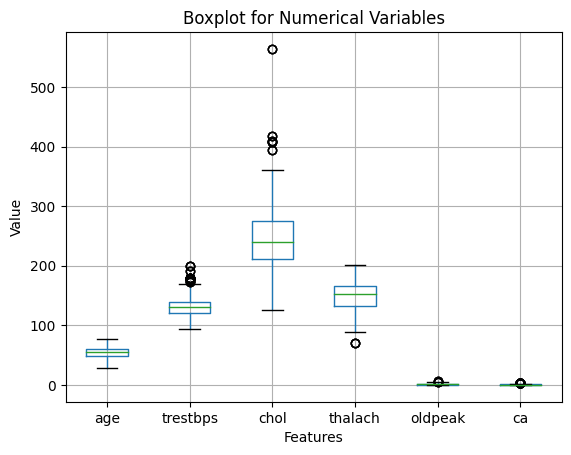

In [9]:
# Menampilkan boxplot
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].boxplot()
plt.title('Boxplot for Numerical Variables')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

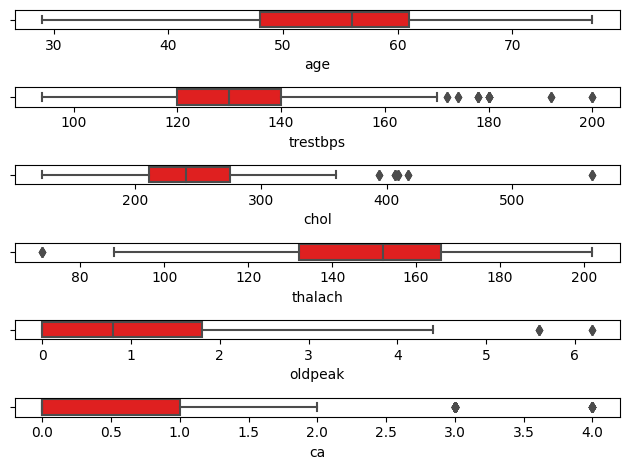

In [10]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for i in range(len(num_cols)):
    plt.subplot(6, 1, i+1)
    sns.boxplot(x=df[num_cols[i]], color='red')
    plt.tight_layout()

plt.show()

- Berdasarkan output di atas, terdapat outlier untuk kolom `trestbps`, `chol`, `thalach`, `oldpeak`, dan `ca`. Outlier ini adalah nilai yang berbeda secara signifikan dari sebagian besar nilai dalam kumpulan data. Meskipun ada outlier, data ini tetap penting dan tidak boleh dihapus karena outlier ini menggambarkan kondisi medis yang jarang namun signifikan, atau mungkin hasil dari kondisi khusus atau anomali dalam pengukuran.

- Outlier bisa memberikan wawasan tambahan atau informasi yang berharga dalam analisis data. Mereka bisa menunjukkan adanya kondisi kesehatan yang berbeda atau keadaan yang ekstrim yang perlu dipertimbangkan dalam evaluasi medis.

Dengan demikian, meskipun outlier ada, data tersebut tetap penting dan tidak boleh dihapus. Penanganan yang tepat adalah dengan mempertimbangkan pendekatan analisis yang lebih robust terhadap outlier dan memastikan bahwa informasi tambahan dari outlier juga dipertimbangkan dalam analisis data.

## Imbalance Data

In [11]:
# Memeriksa imbalance data
target_counts = df['target'].value_counts()
target_counts

1    526
0    499
Name: target, dtype: int64

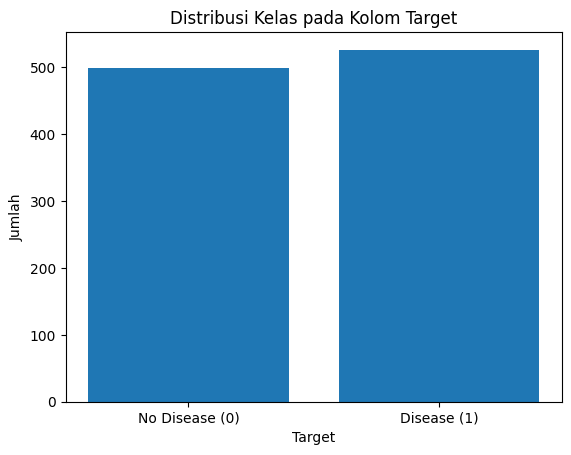

In [12]:
# Bar Chart
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas pada Kolom Target')
plt.xticks(target_counts.index, ['Disease (1)','No Disease (0)'])
plt.show()

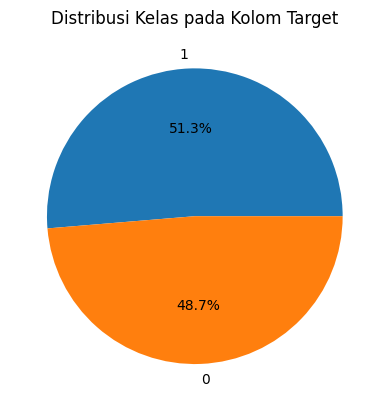

In [13]:
# Pie Chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Kelas pada Kolom Target')
plt.show()

Distribusi kelas pada kolom target menunjukkan bahwa terdapat 526 observasi dengan nilai 1 (merepresentasikan adanya penyakit jantung) dan 499 observasi dengan nilai 0 (merepresentasikan tidak adanya penyakit jantung). Dengan memiliki jumlah observasi yang relatif seimbang antara kelas 0 dan 1, ini menunjukkan bahwa data sudah seimbang. Karena distribusi kelas pada kolom target sudah seimbang, sehingga dalam kasus ini tidak diperlukan penanganan khusus untuk mengatasi ketidakseimbangan data.

## Feature Encoding

In [14]:
# Mencari count value untuk variabel kategorikal
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Looping untuk mencari count value dari setiap kolom kategorikal
for column in cat_columns:
    counts = df[column].value_counts()
    print(f"Count value for '{column}':\n{counts}\n")

Count value for 'sex':
1    713
0    312
Name: sex, dtype: int64

Count value for 'cp':
0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Count value for 'fbs':
0    872
1    153
Name: fbs, dtype: int64

Count value for 'restecg':
1    513
0    497
2     15
Name: restecg, dtype: int64

Count value for 'exang':
0    680
1    345
Name: exang, dtype: int64

Count value for 'slope':
1    482
2    469
0     74
Name: slope, dtype: int64

Count value for 'thal':
2    544
3    410
1     64
0      7
Name: thal, dtype: int64



### Menghapus `thal` yang bernilai 0
Berdasarkan sumber berikut :

https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

Deskripsi pada variabel `thal` menyatakan bahwa nilai 0 digunakan untuk menunjukkan NULL, yang berarti tidak ada data yang tersedia atau informasi yang hilang untuk variabel ini. Jadi, nilai NULL tersebut harus di-drop atau dihapus dari dataset.

In [15]:
df.drop(df[df['thal'] == 0].index, inplace=True)

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
df['thal'].value_counts()

2    544
3    410
1     64
Name: thal, dtype: int64

### Lanjutan Feature Encoding --> ada di Bagian Terakhir

# Exploratory Data Analysis (EDA)


## Analisis Target Heart Disease

Kita akan melakukan EDA pada dataset Heart Disease untuk memahami lebih dalam tentang faktor-faktor yang memengaruhi kemungkinan seseorang mengalami penyakit jantung. Tujuan dari analisis ini adalah untuk mengidentifikasi pola dan hubungan antara variabel-variabel dalam dataset dengan keberadaan penyakit jantung.

*Korelasi variabel-variabel yang mempengaruhi Kemungkinan Penyakit Jantung*

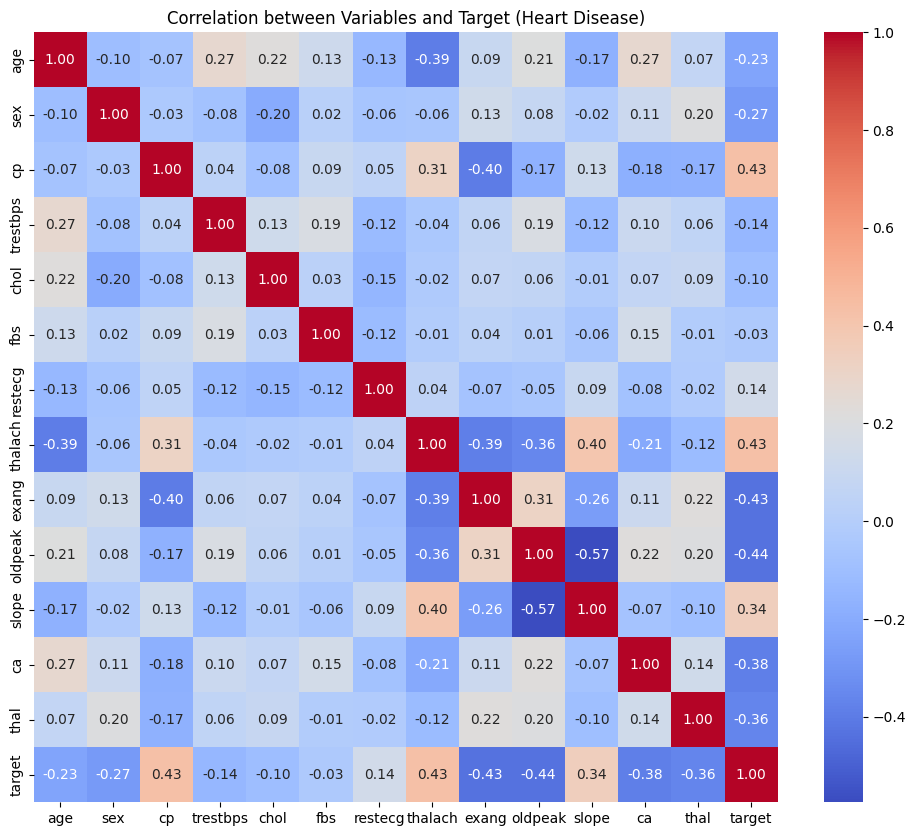

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Variables and Target (Heart Disease)')
plt.show()

Berdasarkan heatmap di atas, diketahui variabel-variabel mana yang paling mempengaruhi `target` ('heart disease'). Selanjutnya, mari kita coba lihat distribusi data untuk masing-masing kolom numerik terhadap kolom `target`.

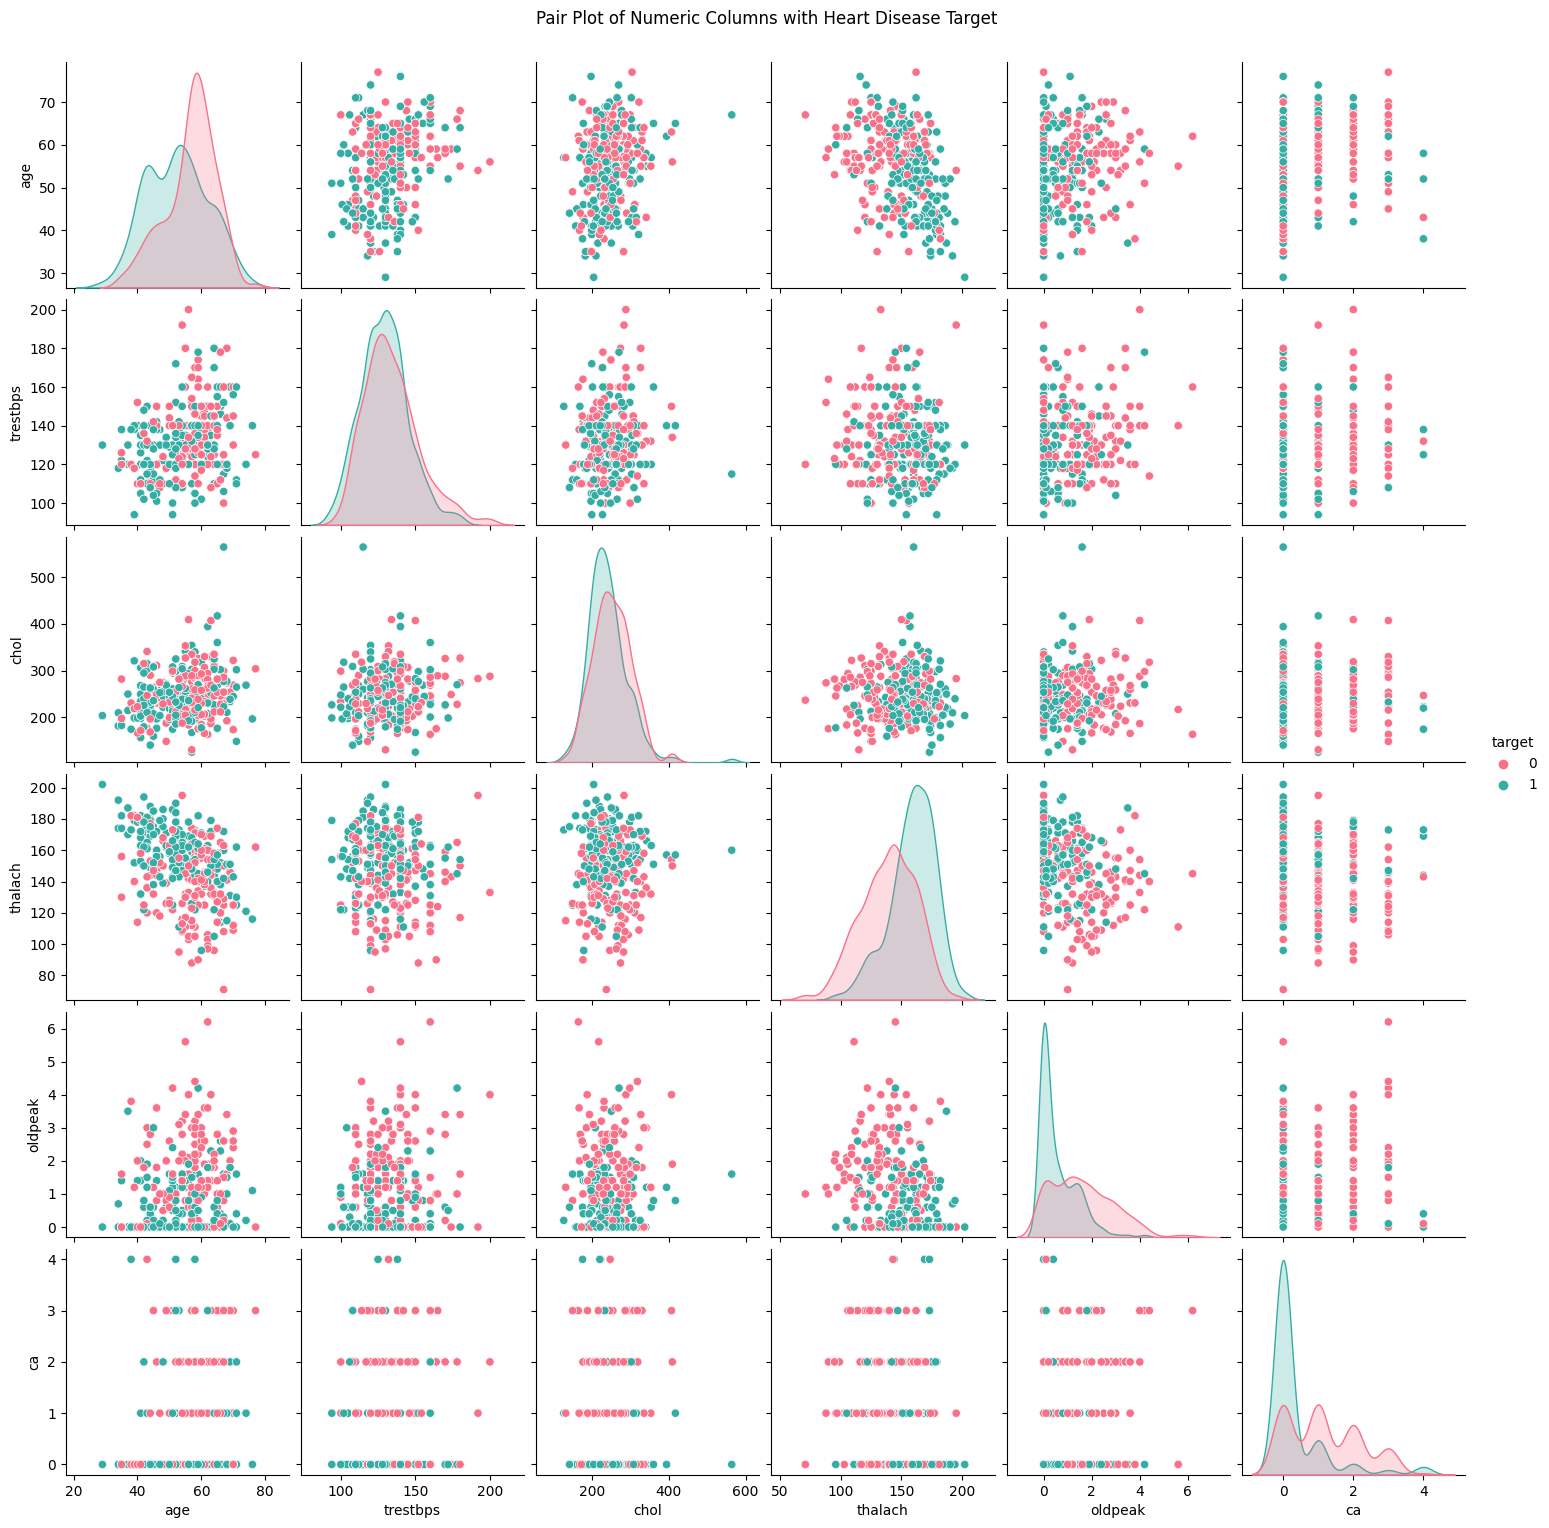

In [19]:
# Memilih kolom numerik yang ingin dianalisis
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']

# Membuat pair plot
sns.pairplot(df[num_cols], hue='target', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Numeric Columns with Heart Disease Target', y=1.02)
plt.show()

Output di atas sangat jelas menggambarkan sebaran jumlah pasien yang didiagnosis penyakit jantung atau tidak berdasarkan kondisi kolom-kolom numerik. Selain itu, kita juga bisa melihat persebaran kolom `target` berdasarkan kolom-kolom kategorikal, dengan menggunakan count plot atau bar plot.

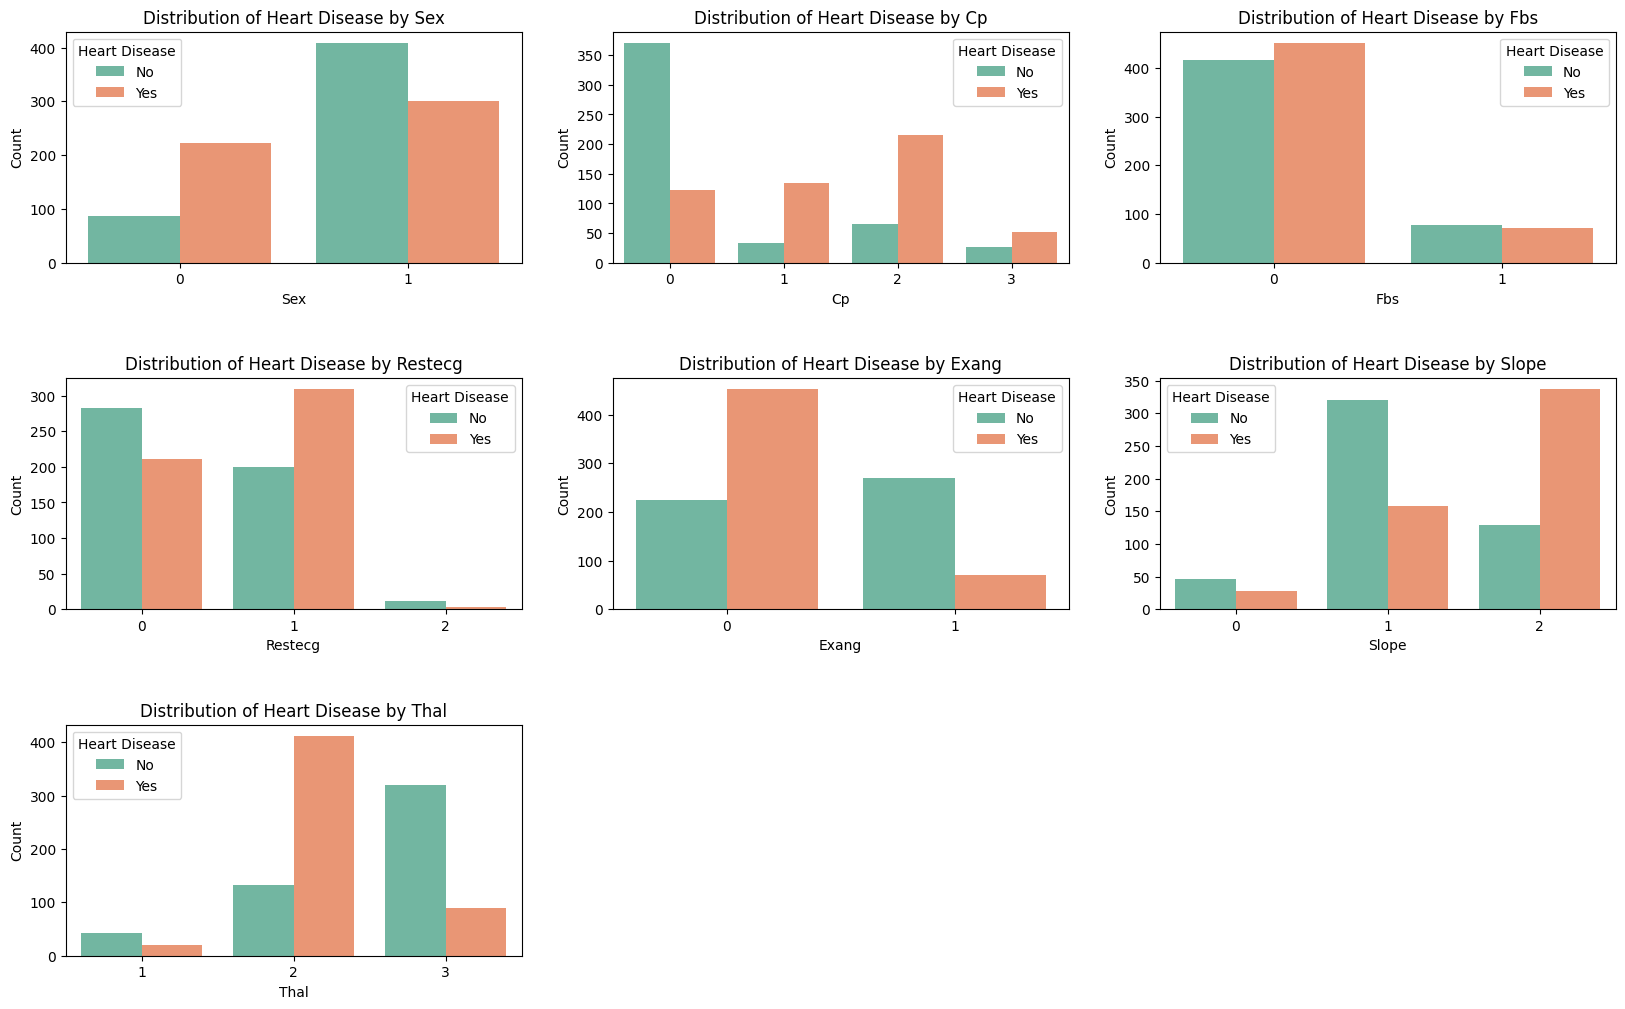

In [20]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Mengatur ukuran dan layout subplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)

# Loop melalui setiap kolom kategorikal
for i, col in enumerate(cat_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue='target', palette='Set2')
    plt.title('Distribution of Heart Disease by {}'.format(col.capitalize()))
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.show()

Melihat output persebaran data numerik dan kategorik terhadap data target di atas, saya tertarik untuk melihat persebaran usia pasien yang didiagnosis penyakit jantung.

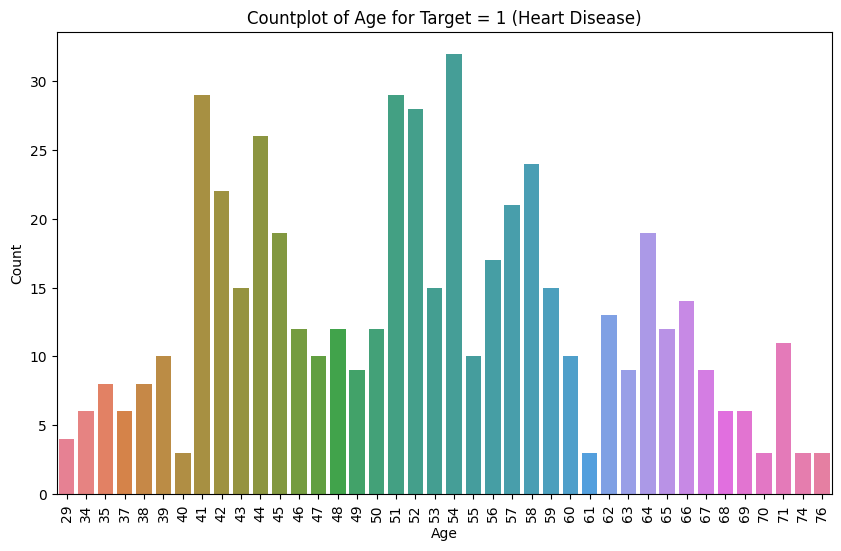

In [21]:
df_target_1 = df[df['target'] == 1]

# Countplot Usia
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df_target_1, palette='husl')
plt.title('Countplot of Age for Target = 1 (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()

Mari kita lihat distribusi usia dari pasien yang didiagnosis dengan penyakit jantung. Dengan menggunakan bar chart di atas, dapat dilihat bahwa pasien dengan usia 54 tahun paling banyak didiagnosis memiliki penyakit jantung.

Selanjutnya, mari kita melihat distribusi usia 54 tahun pada pasien yang didiagnosis dengan penyakit jantung berdasarkan jenis kelamin mereka, apakah sebagian besar laki-laki atau perempuan?

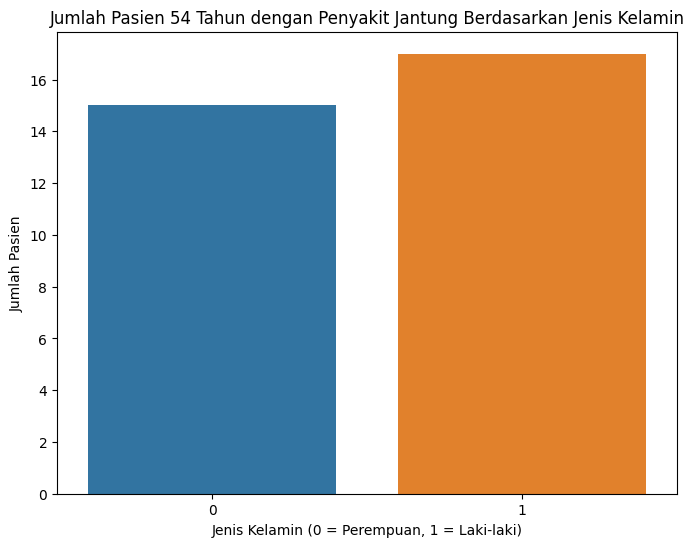

In [22]:
# Filter data untuk pasien yang berusia 54 tahun dan didiagnosis dengan penyakit jantung
data_54_years_heart_disease = df[(df['age'] == 54) & (df['target'] == 1)]

# Membuat countplot untuk distribusi pasien 54 tahun dengan penyakit jantung berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data_54_years_heart_disease)
plt.title('Jumlah Pasien 54 Tahun dengan Penyakit Jantung Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [23]:
data_54_years_heart_disease['sex'].value_counts()

1    17
0    15
Name: sex, dtype: int64

Dari output yang dihasilkan, terlihat bahwa jumlah pasien berusia 54 tahun yang didiagnosis dengan penyakit jantung berdasarkan jenis kelamin jumlahnya hampir seimbang, dengan 17 pria dan 15 wanita. Hal ini menunjukkan bahwa kedua jenis kelamin memiliki potensi yang hampir sama besar untuk mengalami masalah jantung pada usia tersebut.

Rekomendasi dari temuan ini adalah bahwa baik laki-laki maupun perempuan yang berusia 54 tahun harus selalu memperhatikan kesehatan jantung mereka dengan baik. Meskipun secara umum lebih banyak pria yang terkena penyakit jantung, namun perempuan juga memiliki risiko yang signifikan. Oleh karena itu, penting bagi kedua jenis kelamin untuk mengadopsi gaya hidup sehat, rutin memeriksa kesehatan, dan mengikuti saran medis untuk mencegah dan mengelola risiko penyakit jantung.

# Feature Engineering

## 1. Kategori Kelompok Umur
- Bayi dan Balita (< 5 tahun)
- Anak-anak (5-9 tahun)
- Remaja (10-18 tahun)
- Dewasa (19-59 tahun)
- Lansia (>=60 tahun)

Sumber = https://ayosehat.kemkes.go.id/kategori-usia/dewasa

In [24]:
# Membuat fungsi untuk mengkategorikan kelompok umur
def categorize_age(age):
    if age < 5:
        return 'Bayi dan Balita'
    elif 5 <= age <= 9:
        return 'Anak-anak'
    elif 10 <= age <= 18:
        return 'Remaja'
    elif 19 <= age <= 59:
        return 'Dewasa'
    else:
        return 'Lansia'

# Menerapkan fungsi ke kolom 'age' untuk membuat kolom kategori baru
df['age_group'] = df['age'].apply(categorize_age)

age_index = df.columns.get_loc('age')
df.insert(age_index + 1, 'age_group', df.pop('age_group'))
df

,age,age_group,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Dewasa,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Dewasa,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Lansia,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Lansia,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Lansia,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Lansia,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Dewasa,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Dewasa,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `age_group` yang memetakan nilai `age` ke dalam kategori yang lebih deskriptif.

## 2. Keterangan Jenis Kelamin

In [25]:
def gender_description(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

# Menerapkan fungsi ke kolom 'sex' untuk membuat kolom keterangan jenis kelamin baru
df['gender_description'] = df['sex'].apply(gender_description)

sex_index = df.columns.get_loc('sex')
df.insert(sex_index + 1, 'gender_description', df.pop('gender_description'))

df

,age,age_group,sex,gender_description,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Dewasa,1,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Dewasa,1,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Lansia,1,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Lansia,1,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Lansia,0,Female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Lansia,1,Male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Dewasa,1,Male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Dewasa,0,Female,0,110,254,0,0,159,0,0.0,2,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `gender_description` yang memetakan nilai `sex` ke dalam kategori yang lebih deskriptif.

## 3. Keterangan `chest pain type`
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

In [26]:
def chest_pain_description(cp):
    if cp == 0:
        return 'asymptomatic'
    elif cp == 1:
        return 'atypical angina'
    elif cp == 2:
        return 'non-anginal pain'
    else:
        return 'typical angina'

# Menerapkan fungsi ke kolom 'cp' untuk membuat kolom keterangan baru
df['chest_pain_description'] = df['cp'].apply(chest_pain_description)

cp_index = df.columns.get_loc('cp')
df.insert(cp_index + 1, 'chest_pain_description', df.pop('chest_pain_description'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Dewasa,1,Male,0,asymptomatic,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Dewasa,1,Male,0,asymptomatic,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Lansia,1,Male,0,asymptomatic,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Lansia,1,Male,0,asymptomatic,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Lansia,0,Female,0,asymptomatic,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Lansia,1,Male,0,asymptomatic,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Dewasa,1,Male,0,asymptomatic,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Dewasa,0,Female,0,asymptomatic,110,254,0,0,159,0,0.0,2,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `chest_pain_description` yang memetakan nilai `cp` ke dalam kategori yang lebih deskriptif.

## 4. Kategori Tekanan Darah
trestbps = tekanan darah sistolik
- Normal (<120)
- Elevated (120-129)
- Hypertension Stage 1 (130-139)
- Hypertension Stage 2 (140-180)
- Hypertension Crisis (>180)


Sumber: https://medicastore.com/penyakit/5/tekanan-darah-tinggi-hipertensi


In [27]:
def categorize_blood_pressure(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif 120 <= trestbps <= 129:
        return 'Elevated'
    elif 130 <= trestbps <= 139:
        return 'Hypertension Stage 1'
    elif 140 <= trestbps <= 180:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertension Crisis'

# Menerapkan fungsi ke kolom 'trestbps' untuk membuat kolom kategori baru
df['blood_pressure_category'] = df['trestbps'].apply(categorize_blood_pressure)

trestbps_index = df.columns.get_loc('trestbps')
df.insert(trestbps_index + 1, 'blood_pressure_category', df.pop('blood_pressure_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,0,1,168,0,1.0,2,2,3,0
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,1,0,155,1,3.1,0,0,3,0
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,0,1,125,1,2.6,0,0,3,0
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,0,1,161,0,0.0,2,1,3,0
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,0,1,164,1,0.0,2,0,2,1
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,0,0,141,1,2.8,1,1,3,0
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,0,0,118,1,1.0,1,1,2,0
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,0,0,159,0,0.0,2,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `blood_pressure_category` yang memetakan nilai `trestbps` ke dalam kategori yang lebih deskriptif.

## 5. Kategori Total Kolesterol
- Tinggi (>240 mg/dL)
- Agak Tinggi (200 - 239 mg/dL)
- Baik (<200 mg/dL)

Sumber: https://p2ptm.kemkes.go.id/infographic-p2ptm/hipertensi-penyakit-jantung-dan-pembuluh-darah/page/37/berapa-nilai-kolesterol-total-anda

In [28]:
def categorize_cholesterol(chol):
    if chol > 240:
        return 'Tinggi'
    elif 200 <= chol <= 239:
        return 'Agak Tinggi'
    else:
        return 'Baik'

# Menerapkan fungsi ke kolom 'chol' untuk membuat kolom kategori baru
df['total_cholesterol_category'] = df['chol'].apply(categorize_cholesterol)

chol_index = df.columns.get_loc('chol')
df.insert(chol_index + 1, 'total_cholesterol_category', df.pop('total_cholesterol_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,0,1,168,0,1.0,2,2,3,0
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,1,0,155,1,3.1,0,0,3,0
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,0,1,125,1,2.6,0,0,3,0
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,0,1,161,0,0.0,2,1,3,0
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,0,1,164,1,0.0,2,0,2,1
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,0,0,141,1,2.8,1,1,3,0
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,0,0,118,1,1.0,1,1,2,0
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,0,0,159,0,0.0,2,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `total_cholesterol_category` yang memetakan nilai `chol` ke dalam kategori yang lebih deskriptif.

## 6. Kategori `slope`

In [29]:
def categorize_slope(slope):
    if slope == 0:
        return 'Downsloping'
    elif slope == 1:
        return 'Flat'
    elif slope == 2:
        return 'Upsloping'
    else:
        return 'Unknown'

# Menerapkan fungsi ke kolom 'slope' untuk membuat kolom kategori baru
df['slope_category'] = df['slope'].apply(categorize_slope)

slope_index = df.columns.get_loc('slope')
df.insert(slope_index + 1, 'slope_category', df.pop('slope_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,fbs,restecg,thalach,exang,oldpeak,slope,slope_category,ca,thal,target
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,0,1,168,0,1.0,2,Upsloping,2,3,0
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,1,0,155,1,3.1,0,Downsloping,0,3,0
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,0,1,125,1,2.6,0,Downsloping,0,3,0
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,0,1,161,0,0.0,2,Upsloping,1,3,0
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,1,1,106,0,1.9,1,Flat,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,0,1,164,1,0.0,2,Upsloping,0,2,1
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,0,0,141,1,2.8,1,Flat,1,3,0
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,0,0,118,1,1.0,1,Flat,1,2,0
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,0,0,159,0,0.0,2,Upsloping,0,2,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `slope_category` yang memetakan nilai `slope` ke dalam kategori yang lebih deskriptif.

## 7. Kategori `thal`

In [30]:
def categorize_thal(thal):
    if thal == 1:
        return 'Fixed Defect'
    elif thal == 2:
        return 'Normal Blood Flow'
    else:
        return 'Reversible Defect'

# Menerapkan fungsi ke kolom 'thal' untuk membuat kolom kategori baru
df['thal_category'] = df['thal'].apply(categorize_thal)

thal_index = df.columns.get_loc('thal')
df.insert(thal_index + 1, 'thal_category', df.pop('thal_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,...,restecg,thalach,exang,oldpeak,slope,slope_category,ca,thal,thal_category,target
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,...,1,168,0,1.0,2,Upsloping,2,3,Reversible Defect,0
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,...,0,155,1,3.1,0,Downsloping,0,3,Reversible Defect,0
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,...,1,125,1,2.6,0,Downsloping,0,3,Reversible Defect,0
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,...,1,161,0,0.0,2,Upsloping,1,3,Reversible Defect,0
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,...,1,106,0,1.9,1,Flat,3,2,Normal Blood Flow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,...,1,164,1,0.0,2,Upsloping,0,2,Normal Blood Flow,1
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,...,0,141,1,2.8,1,Flat,1,3,Reversible Defect,0
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,...,0,118,1,1.0,1,Flat,1,2,Normal Blood Flow,0
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,...,0,159,0,0.0,2,Upsloping,0,2,Normal Blood Flow,1


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `thal_category` yang memetakan nilai `thal` ke dalam kategori yang lebih deskriptif.

## 8. Kategori `target`

In [31]:
def categorize_target(target):
    if target == 1:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

# Menerapkan fungsi ke kolom 'target' untuk membuat kolom kategori baru
df['target_category'] = df['target'].apply(categorize_target)

target_index = df.columns.get_loc('target')
df.insert(target_index + 1, 'target_category', df.pop('target_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,...,thalach,exang,oldpeak,slope,slope_category,ca,thal,thal_category,target,target_category
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,...,168,0,1.0,2,Upsloping,2,3,Reversible Defect,0,No Heart Disease
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,...,155,1,3.1,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,...,125,1,2.6,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,...,161,0,0.0,2,Upsloping,1,3,Reversible Defect,0,No Heart Disease
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,...,106,0,1.9,1,Flat,3,2,Normal Blood Flow,0,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,...,164,1,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,...,141,1,2.8,1,Flat,1,3,Reversible Defect,0,No Heart Disease
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,...,118,1,1.0,1,Flat,1,2,Normal Blood Flow,0,No Heart Disease
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,...,159,0,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `target_category` yang memetakan nilai `target` ke dalam kategori yang lebih deskriptif.

## 9. Kategori `exang`

In [32]:
def categorize_exang(exang):
    if exang == 0:
        return 'No'
    elif exang == 1:
        return 'Yes'
    else:
        return 'Unknown'

# Menerapkan fungsi ke kolom 'exang' untuk membuat kolom kategori baru
df['exang_category'] = df['exang'].apply(categorize_exang)

exang_index = df.columns.get_loc('exang')
df.insert(exang_index + 1, 'exang_category', df.pop('exang_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,...,exang,exang_category,oldpeak,slope,slope_category,ca,thal,thal_category,target,target_category
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,...,0,No,1.0,2,Upsloping,2,3,Reversible Defect,0,No Heart Disease
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,...,1,Yes,3.1,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,...,1,Yes,2.6,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,...,0,No,0.0,2,Upsloping,1,3,Reversible Defect,0,No Heart Disease
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,...,0,No,1.9,1,Flat,3,2,Normal Blood Flow,0,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,...,1,Yes,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,...,1,Yes,2.8,1,Flat,1,3,Reversible Defect,0,No Heart Disease
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,...,1,Yes,1.0,1,Flat,1,2,Normal Blood Flow,0,No Heart Disease
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,...,0,No,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `exang_category` yang memetakan nilai `exang` ke dalam kategori yang lebih deskriptif.

## 10. Kategori `restecg`

In [33]:
def categorize_restecg(restecg):
    if restecg == 0:
        return 'Probable or Definite Left Ventricular Hypertrophy'
    elif restecg == 1:
        return 'Normal'
    elif restecg == 2:
        return 'ST-T Wave Abnormality'
    else:
        return 'Unknown'

# Menerapkan fungsi ke kolom 'restecg' untuk membuat kolom kategori baru
df['restecg_category'] = df['restecg'].apply(categorize_restecg)

restecg_index = df.columns.get_loc('restecg')
df.insert(restecg_index + 1, 'restecg_category', df.pop('restecg_category'))
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,...,exang,exang_category,oldpeak,slope,slope_category,ca,thal,thal_category,target,target_category
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,...,0,No,1.0,2,Upsloping,2,3,Reversible Defect,0,No Heart Disease
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,...,1,Yes,3.1,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,...,1,Yes,2.6,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,...,0,No,0.0,2,Upsloping,1,3,Reversible Defect,0,No Heart Disease
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,...,0,No,1.9,1,Flat,3,2,Normal Blood Flow,0,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,...,1,Yes,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,...,1,Yes,2.8,1,Flat,1,3,Reversible Defect,0,No Heart Disease
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,...,1,Yes,1.0,1,Flat,1,2,Normal Blood Flow,0,No Heart Disease
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,...,0,No,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease


Dengan demikian, output data yang dihasilkan adalah DataFrame yang sama dengan tambahan kolom baru `restecg_category` yang memetakan nilai `restecg` ke dalam kategori yang lebih deskriptif.

In [34]:
df

,age,age_group,sex,gender_description,cp,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,...,exang,exang_category,oldpeak,slope,slope_category,ca,thal,thal_category,target,target_category
0,52,Dewasa,1,Male,0,asymptomatic,125,Elevated,212,Agak Tinggi,...,0,No,1.0,2,Upsloping,2,3,Reversible Defect,0,No Heart Disease
1,53,Dewasa,1,Male,0,asymptomatic,140,Hypertension Stage 2,203,Agak Tinggi,...,1,Yes,3.1,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
2,70,Lansia,1,Male,0,asymptomatic,145,Hypertension Stage 2,174,Baik,...,1,Yes,2.6,0,Downsloping,0,3,Reversible Defect,0,No Heart Disease
3,61,Lansia,1,Male,0,asymptomatic,148,Hypertension Stage 2,203,Agak Tinggi,...,0,No,0.0,2,Upsloping,1,3,Reversible Defect,0,No Heart Disease
4,62,Lansia,0,Female,0,asymptomatic,138,Hypertension Stage 1,294,Tinggi,...,0,No,1.9,1,Flat,3,2,Normal Blood Flow,0,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Dewasa,1,Male,1,atypical angina,140,Hypertension Stage 2,221,Agak Tinggi,...,1,Yes,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease
1021,60,Lansia,1,Male,0,asymptomatic,125,Elevated,258,Tinggi,...,1,Yes,2.8,1,Flat,1,3,Reversible Defect,0,No Heart Disease
1022,47,Dewasa,1,Male,0,asymptomatic,110,Normal,275,Tinggi,...,1,Yes,1.0,1,Flat,1,2,Normal Blood Flow,0,No Heart Disease
1023,50,Dewasa,0,Female,0,asymptomatic,110,Normal,254,Tinggi,...,0,No,0.0,2,Upsloping,0,2,Normal Blood Flow,1,Heart Disease


## Lanjutan Feature Encoding

In [35]:
### Encoding Kolom Numerik (Min-Max Scaling):
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menggunakan MinMaxScaler untuk melakukan scaling pada kolom numerik
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[num_col] = scaler.fit_transform(df[num_col])

In [36]:
### Encoding Kolom Kategorikal (One-Hot Encoding):
# Melakukan One-Hot Encoding pada kolom kategorikal
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df = pd.get_dummies(df, columns=cat_col)

In [37]:
df

,age,age_group,gender_description,chest_pain_description,trestbps,blood_pressure_category,chol,total_cholesterol_category,restecg_category,thalach,...,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.479167,Dewasa,Male,asymptomatic,0.292453,Elevated,0.196347,Agak Tinggi,Normal,0.740458,...,1,0,1,0,0,0,1,0,0,1
1,0.500000,Dewasa,Male,asymptomatic,0.433962,Hypertension Stage 2,0.175799,Agak Tinggi,Probable or Definite Left Ventricular Hypertrophy,0.641221,...,0,0,0,1,1,0,0,0,0,1
2,0.854167,Lansia,Male,asymptomatic,0.481132,Hypertension Stage 2,0.109589,Baik,Normal,0.412214,...,1,0,0,1,1,0,0,0,0,1
3,0.666667,Lansia,Male,asymptomatic,0.509434,Hypertension Stage 2,0.175799,Agak Tinggi,Normal,0.687023,...,1,0,1,0,0,0,1,0,0,1
4,0.687500,Lansia,Female,asymptomatic,0.415094,Hypertension Stage 1,0.383562,Tinggi,Normal,0.267176,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,Dewasa,Male,atypical angina,0.433962,Hypertension Stage 2,0.216895,Agak Tinggi,Normal,0.709924,...,1,0,0,1,0,0,1,0,1,0
1021,0.645833,Lansia,Male,asymptomatic,0.292453,Elevated,0.301370,Tinggi,Probable or Definite Left Ventricular Hypertrophy,0.534351,...,0,0,0,1,0,1,0,0,0,1
1022,0.375000,Dewasa,Male,asymptomatic,0.150943,Normal,0.340183,Tinggi,Probable or Definite Left Ventricular Hypertrophy,0.358779,...,0,0,0,1,0,1,0,0,1,0
1023,0.437500,Dewasa,Female,asymptomatic,0.150943,Normal,0.292237,Tinggi,Probable or Definite Left Ventricular Hypertrophy,0.671756,...,0,0,1,0,0,0,1,0,1,0


Output data tersebut menjalankan dua proses encoding data:

1. **Min-Max Scaling**:
   - Normalisasi data numerik ke dalam rentang 0 hingga 1.
   - Kolom numerik seperti 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', dan 'ca' diubah menggunakan Min-Max Scaling.
   - Alasan dipilihnya Min-Max Scaling, karena agar data yang memiliki nilai outlier tidak memiliki pengaruh yang terlalu besar terhadap model machine learning. Ini karena seluruh rentang data diubah sehingga outlier akan terdistribusi dalam rentang yang sama seperti data lainnya.

2. **One-Hot Encoding**:
   - Konversi variabel kategorikal menjadi representasi biner.
   - Kolom kategorikal seperti 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', dan 'thal' diubah menggunakan One-Hot Encoding.
   - Dalam data kategorikal, tidak ada urutan yang bermakna antara nilai-nilai kategori, sehingga dipilihnya One-Hot Encoding karena metode ini memperlakukan setiap nilai kategori secara independen, sehingga menghindari kesalahan dalam menafsirkan hubungan atau urutan antar-nilai.

Dengan melakukan kedua proses ini, data siap untuk digunakan dalam model machine learning karena telah dinormalisasi dan variabel kategorikalnya telah diubah menjadi format yang dapat dimengerti oleh model.